## **Connected Kaggle Account with Google collab to read the Dataset**

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "adityajadhav5" # username from the json file
os.environ['KAGGLE_KEY'] = "9a5852318a6bc9dbff62480ad38535b1" # key from the json file
# you can use your name and key for project, just check how to get kaggle key for the dataset of dogs-vs-cats!kaggle competitions download -c dogs-vs-cats # api copied from kaggle

... resuming from 205520896 bytes (646055793 bytes left) ...
100% 811M/812M [00:21<00:00, 33.2MB/s]
100% 812M/812M [00:21<00:00, 30.7MB/s]


## Extracted Data from zip **files**

In [ ]:
#extract the contents
from zipfile import ZipFile

file_name = "/content/dogs-vs-cats.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
#extract the contents
from zipfile import ZipFile

file_name = "/content/train.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('train data extctracted')


file_name = "/content/test1.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('test data exctrated')

train data extctracted
test data exctrated


## Chekced File count to verify Dataset

In [ ]:
data_dir_list = os.listdir('/content/train')
#print(data_dir_list)

path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

25000


## Made a another Directory to hold the sample data

In [ ]:
original_dataset_dir = '/content/train'
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir) #make base directory to store dataset in small size

## created Train and Test in sample directory

In [ ]:
#Create directory paths

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

## Copied some images to Sample directory, using shutil

In [ ]:
import shutil

#store data in cat/train
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#store data in cat/test
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

#store data in dog/train
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#store data in dog/test
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

## imported libraries for CNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

### Loaded Sample Data
# created validation directory from train dataset with split value 0.2, so we can get about 400 images as train set has 1600 images

In [ ]:

# Load the data using the ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = datagen.flow_from_directory('/content/cats_and_dogs_small/train', target_size=(224, 224), batch_size=32, class_mode='binary', subset='training')
val_data = datagen.flow_from_directory('/content/cats_and_dogs_small/train', target_size=(224, 224), batch_size=32, class_mode='binary', subset='validation')
test_data = datagen.flow_from_directory('/content/cats_and_dogs_small/test', target_size=(224, 224), batch_size=32, class_mode='binary')


Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Applied Layers for CNN , layers of kernel sizes 32 -> 64 -> 128 -> 256
# added a **Dropout** layer so that overfitting can be minimized

In [ ]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))



# compiled, Trained upto **10 epoches**, and

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=10, validation_data=val_data)

#save model
model.save('cats_and_dogs_small_1.h5')



Epoch 1/10
50/50 [==============================] - 252s 5s/step - loss: 0.7014 - accuracy: 0.4863 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 250s 5s/step - loss: 0.6935 - accuracy: 0.4919 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
50/50 [==============================] - 231s 5s/step - loss: 0.6933 - accuracy: 0.5013 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - 235s 5s/step - loss: 0.6935 - accuracy: 0.5044 - val_loss: 0.6923 - val_accuracy: 0.5075
Epoch 5/10
50/50 [==============================] - 242s 5s/step - loss: 0.6934 - accuracy: 0.4988 - val_loss: 0.6877 - val_accuracy: 0.5225
Epoch 6/10
50/50 [==============================] - 238s 5s/step - loss: 0.6895 - accuracy: 0.5381 - val_loss: 0.6697 - val_accuracy: 0.6300
Epoch 7/10
50/50 [==============================] - 253s 5s/step - loss: 0.6674 - accuracy: 0.6081 - val_loss: 0.6637 - val_accuracy: 0.6250
Epoch 8/10
50

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Tested aginst Test directory to get overall accuracy

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)
print('Test accuracy:', test_acc)

32/32 [==============================] - 39s 1s/step - loss: 0.6422 - accuracy: 0.6650
Test accuracy: 0.6650000214576721


# Tried one random dog Image from test set

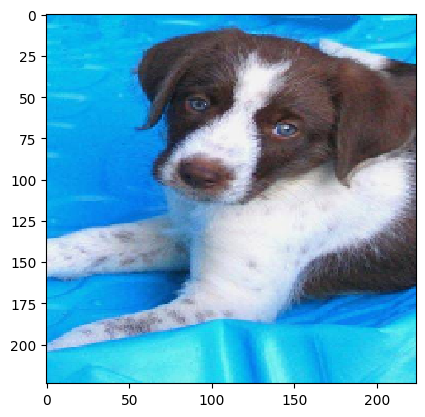

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
path = '/content/cats_and_dogs_small/test/dogs/dog.1561.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()


In [ ]:
img_array = np.array(img)
img_array.shape

img_array = img_array.reshape(1, 224, 224, 3)

a = model.predict(img_array)

if a == [[1.0]]:
  print("it is a Dog")
else:
  print("it is a Cat")

1/1 [==============================] - 0s 63ms/step
it is a Dog


# tried one random cat image from test directory

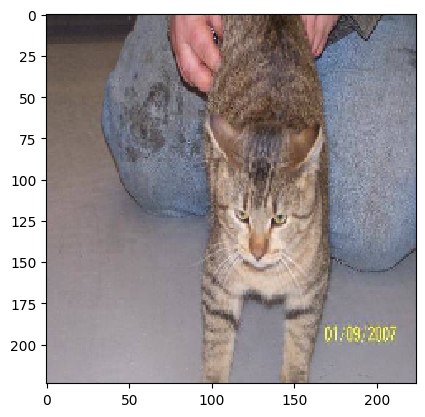

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
path = '/content/cats_and_dogs_small/test/cats/cat.1950.jpg'
img1 = image.load_img(path,target_size=(224,224))
plt.imshow(img1,interpolation='nearest')
plt.show()

In [ ]:
img_array = np.array(img1)
img_array.shape

img_array = img_array.reshape(1, 224, 224, 3)

a = model.predict(img_array)

if a == [[0.0]]:
  print("it is a Cat")
else:
  print("it is a Dog")

1/1 [==============================] - 0s 67ms/step
it is a Cat


# Turns out to be overall Accuracy is ***69.49%*** of out CNN Model